In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Python Projects\Expanded_data_with_more_features.csv')

In [5]:
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [9]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [3]:
# drop Unnamed: 0 column 
df.drop (['Unnamed: 0'],axis = 1, inplace = True)

In [4]:
df.dropna(inplace = True)

In [4]:
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


# Gender distribution

In [11]:
df.shape

(30641, 14)

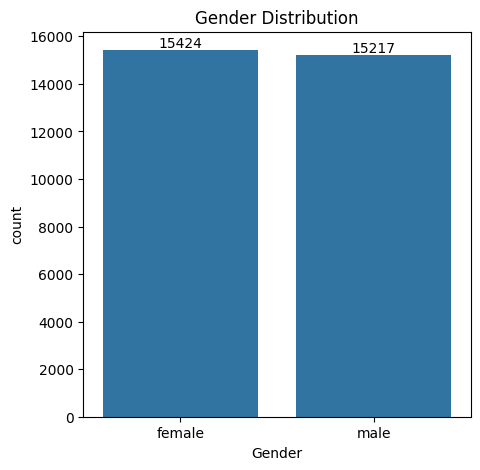

In [4]:
plt.figure(figsize=(5,5))
ax = sns.countplot(data = df, x = "Gender")
plt.title('Gender Distribution')
ax.bar_label(ax.containers[0])
plt.show()

#from the this chart it has been analysed that the number of females is more than that of males.

# The impact of parent education on the education of the students. 

In [35]:
gb = df.groupby("ParentEduc").agg({"MathScore" : "mean","ReadingScore" : "mean", "WritingScore" : "mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.541478     71.317685     70.551080
bachelor's degree   70.724379     73.560401     73.873964
high school         64.294461     67.284124     65.495892
master's degree     72.293680     75.922677     76.423792
some college        66.578305     69.300113     68.651525
some high school    62.522417     65.438218     63.572171


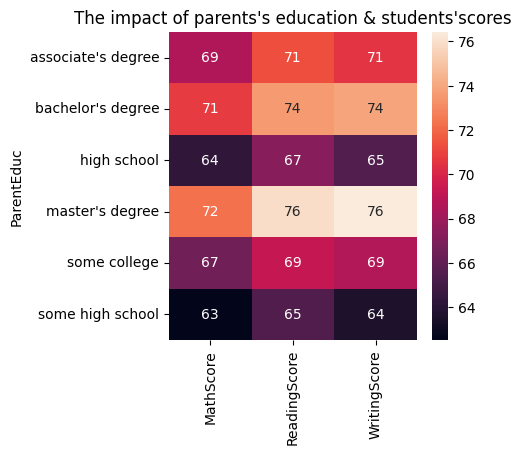

In [36]:
plt.figure(figsize = (4,4))
sns.heatmap(gb, annot = True)
plt.title("The impact of parents's education & students'scores")
plt.show()

# from this analysis it is concluded that the parents'education has a great impact on the education of the students 

# Parent marital status on the education of the students. 

In [37]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore" : "mean","ReadingScore" : "mean", "WritingScore" : "mean"})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.730344     69.816339     68.954545
married              66.705241     69.474248     68.488509
single               66.285590     69.388021     68.543403
widowed              68.083784     70.662162     69.651351


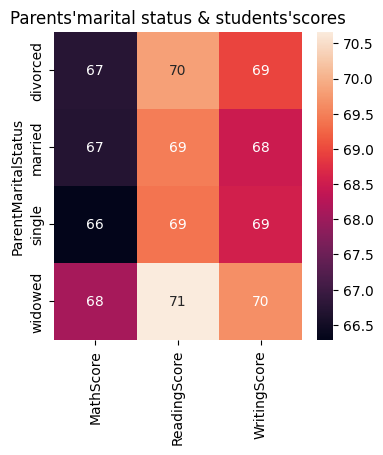

In [38]:
plt.figure(figsize = (4,4))
sns.heatmap(gb1, annot = True)
plt.title("Parents'marital status & students'scores")
plt.show()

# from this chart it is concluded that parents' marital status has no or negligible impact on the students' learning performance.

# we use box plot to see outliers 

<Axes: xlabel='ReadingScore'>

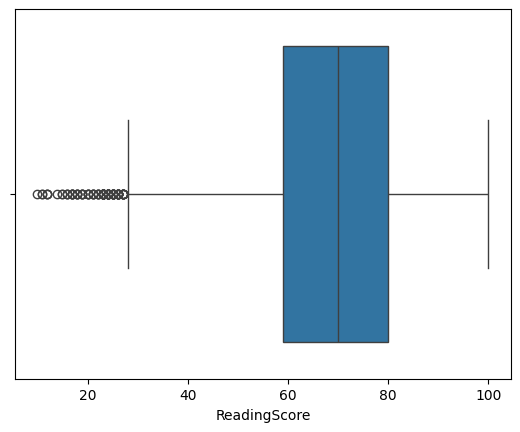

In [4]:
sns.boxplot(data = df , x = "ReadingScore") 

# from this chart we can see some outliers. 

<Axes: xlabel='MathScore'>

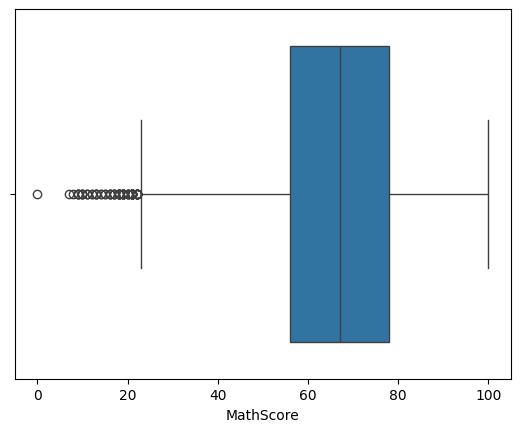

In [5]:
sns.boxplot(data = df , x = "MathScore") 

# from this chart we can see there are many outliers among them and one outlier is at zero. 

<Axes: xlabel='WritingScore'>

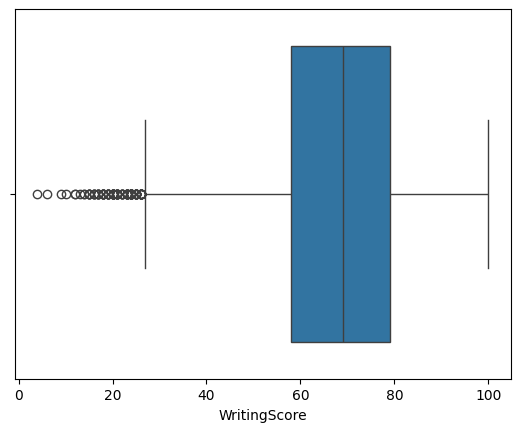

In [6]:
sns.boxplot(data = df , x = "WritingScore")

#from this chart we can see some data points that are below the mark of 10, are outliers. 

In [ ]:
# from the above 3 box plots it is concluded that the students are comparatively weak in Maths subjects. 

In [7]:
gb2 = df.groupby("TestPrep").agg({"MathScore" : "mean","ReadingScore" : "mean", "WritingScore" : "mean"})

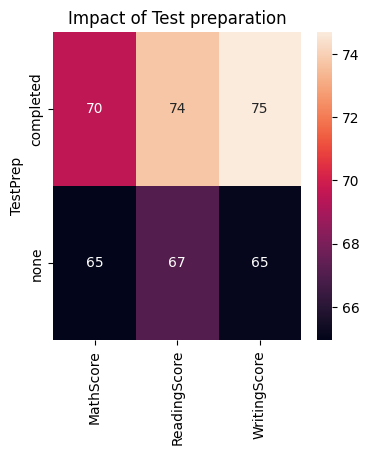

In [14]:
plt.figure(figsize = (4,4))
sns.heatmap(gb2, annot = True)
plt.title("Impact of Test preparation")
plt.show()

# from this chart we can see that those who have practised tests, scored good marks compared to those who have not. 

In [9]:
gb3 = df.groupby("LunchType").agg({"MathScore" : "mean","ReadingScore" : "mean", "WritingScore" : "mean"})

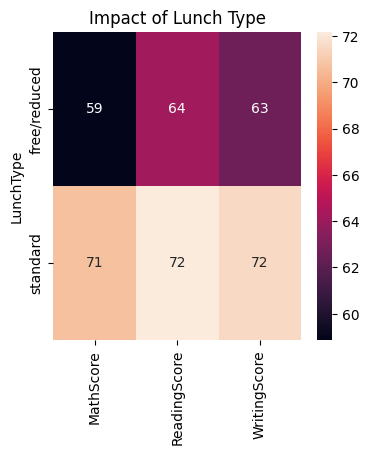

In [13]:
plt.figure(figsize = (4,4))
sns.heatmap(gb3, annot = True)
plt.title("Impact of Lunch Type" )
plt.show()

# from this chart it is concluded that those who have a standard lunch, perform relatively well in all the subjects 
# compared to those who have reduced/free lunch type. 

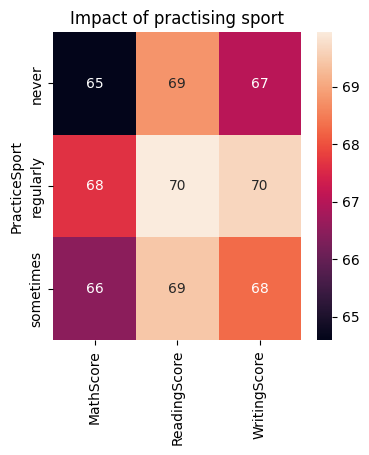

In [47]:
gb4 = df.groupby("PracticeSport").agg({"MathScore" : "mean","ReadingScore" : "mean", "WritingScore" : "mean"})

plt.figure(figsize = (4,4))
sns.heatmap(gb4, annot = True)
plt.title("Impact of practising sport")
plt.show()


In [44]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

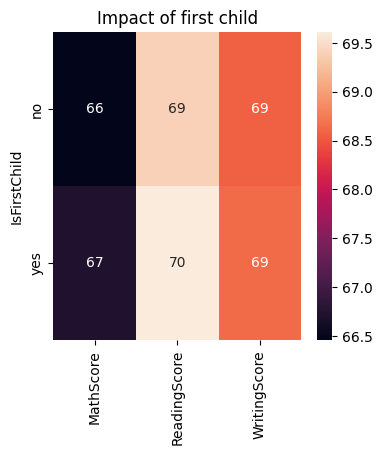

In [46]:
gb5 = df.groupby("IsFirstChild").agg({"MathScore" : "mean","ReadingScore" : "mean", "WritingScore" : "mean"})

plt.figure(figsize = (4,4))
sns.heatmap(gb5, annot = True)
plt.title("Impact of first child")
plt.show()

# from the above chart we can see that the first child parameter does not have much impact on the students' scores. 

# Distribution of Ethnic groups

In [6]:
print(df["EthnicGroup"].unique()) 

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


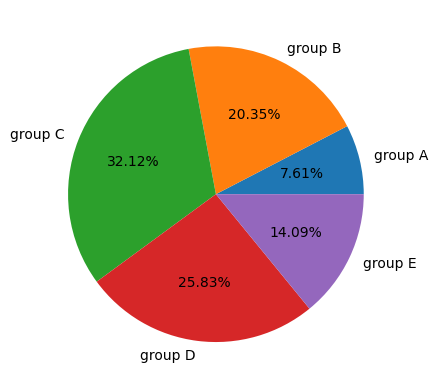

In [10]:

groupA = df.loc[df['EthnicGroup'] == 'group A'].count()
groupB = df.loc[df['EthnicGroup'] == 'group B'].count()
groupC = df.loc[df['EthnicGroup'] == 'group C'].count()
groupD = df.loc[df['EthnicGroup'] == 'group D'].count()
groupE = df.loc[df['EthnicGroup'] == 'group E'].count()

l = ['group A', 'group B', 'group C', 'group D', 'group E']
my_list = [groupA['EthnicGroup'], groupB['EthnicGroup'], groupC['EthnicGroup'], groupD['EthnicGroup'],groupE['EthnicGroup']]
plt.pie(my_list , labels = l, autopct = "%1.2f%%")
plt.show()

#The ethnic group C has the largest population. 


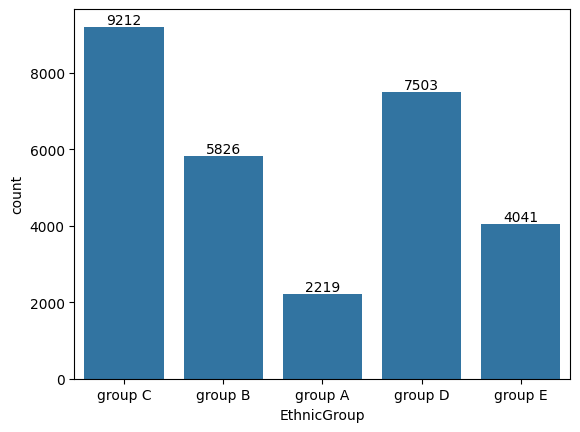

In [9]:
ax = sns.countplot(data = df, x = 'EthnicGroup')
ax.bar_label(ax.containers[0])
plt.show()

#The count of Ethnic Groups.